## Fine-tune MobileNet on sign language digits

### Image preparation

Dataset:
https://github.com/ardamavi/Sign-Language-Digits-Dataset <br>
Kaggle: https://www.kaggle.com/ardamavi/sign-language-digits-dataset#Sign-language-digits-dataset.zip
- 10 classes (digits 0-9)
- Class data:

  - class 0: 205 images
  - class 1: 206 images
  - class 2: 206 images
  - class 3: 206 images
  - class 4: 207 images
  - class 5: 207 images
  - class 6: 207 images
  - class 7: 206 images
  - class 8: 208 images
  - class 9: 204 images

In [12]:
# Save files to Sign Language Digits Dataset directory (which resides in current directory where this notebook is saved)
# Create train, valid, test folders in Sign Language Digits Dataset
%cd Sign-Language-Digits-Dataset
%mkdir train
%mkdir valid
%mkdir test

/home/epoch/nbs/Sign Language Digits Dataset


In [13]:
# Move all class directories with images into train/
%mv 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/ train/

In [16]:
# Make class directories for valid and test data sets
%cd valid
%mkdir 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/

%cd ../test
%mkdir 0/ 1/ 2/ 3/ 4/ 5/ 6/ 7/ 8/ 9/

/home/epoch/nbs/Sign Language Digits Dataset/valid
/home/epoch/nbs/Sign Language Digits Dataset/test


In [ ]:
# In the next cell:
# Using bash, loop through each class directory in /train and randomly move 30 images from each class into the 
# corresponding class directory in /valid and 5 images from each class into the corresponding class directory in /test.

In [37]:
%%bash
cd ../train
for ((i=0; i<=9; i++)); do
    a=$(find $i/ -type f | shuf -n 30)
    mv $a ../valid/$i/
    b=$(find $i/ -type f | shuf -n 5)
    mv $b ../test/$i/
done

In [50]:
# Move back into current notebook directory
%cd ../..

/home/epoch/nbs


In [24]:
train_path = 'Sign-Language-Digits-Dataset/train'
valid_path = 'Sign-Language-Digits-Dataset/valid'
test_path = 'Sign-Language-Digits-Dataset/test'

In [25]:
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


### Modify Model

In [26]:
mobile = keras.applications.mobilenet.MobileNet()

In [25]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [27]:
x = mobile.layers[-6].output
predictions = Dense(10, activation='softmax')(x)

In [35]:
model = Model(inputs=mobile.input, outputs=predictions)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [30]:
for layer in model.layers[:-23]:
    layer.trainable = False

### Train the model

In [31]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit_generator(train_batches, steps_per_epoch=18, 
                    validation_data=valid_batches, validation_steps=3, epochs=60, verbose=2)

Epoch 1/60
 - 18s - loss: 2.3999 - acc: 0.2222 - val_loss: 2.4018 - val_acc: 0.2000
Epoch 2/60
 - 16s - loss: 1.3126 - acc: 0.5500 - val_loss: 1.8358 - val_acc: 0.3333
Epoch 3/60
 - 17s - loss: 0.9714 - acc: 0.6944 - val_loss: 1.3529 - val_acc: 0.7333
Epoch 4/60
 - 16s - loss: 0.6400 - acc: 0.8056 - val_loss: 1.1904 - val_acc: 0.6000
Epoch 5/60
 - 17s - loss: 0.4123 - acc: 0.8944 - val_loss: 1.0416 - val_acc: 0.6667
Epoch 6/60
 - 16s - loss: 0.5355 - acc: 0.7964 - val_loss: 1.3546 - val_acc: 0.5333
Epoch 7/60
 - 16s - loss: 0.3856 - acc: 0.9111 - val_loss: 1.1336 - val_acc: 0.6333
Epoch 8/60
 - 16s - loss: 0.3528 - acc: 0.8722 - val_loss: 1.5005 - val_acc: 0.5333
Epoch 9/60
 - 17s - loss: 0.3619 - acc: 0.8833 - val_loss: 0.5467 - val_acc: 0.9333
Epoch 10/60
 - 17s - loss: 0.2514 - acc: 0.9333 - val_loss: 1.0794 - val_acc: 0.6667
Epoch 11/60
 - 17s - loss: 0.1867 - acc: 0.9778 - val_loss: 0.9299 - val_acc: 0.7000
Epoch 12/60
 - 16s - loss: 0.1514 - acc: 0.9778 - val_loss: 1.3129 - val_a

### Predict sign language digits

In [32]:
test_labels = test_batches.classes

In [33]:
predictions = model.predict_generator(test_batches, steps=5, verbose=0)

In [36]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [37]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 4 0 1 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 1 4 0 0 0 0]
 [0 0 0 0 1 0 4 0 0 0]
 [0 0 0 0 1 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 1 0 0 0 0 4]]


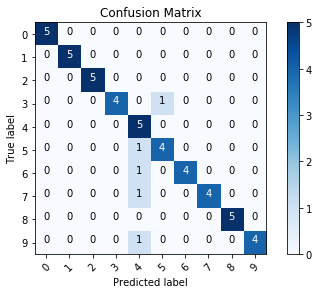

In [38]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')